# Signal processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
import os
import scipy
import scipy.signal as signal


In [2]:
data_path = "D:\\DLITE\\Sun_Observering_Interferometry\\Data\\2025_04_25"

file_list = os.listdir(data_path)
number_file = len(file_list)

file_list

['2025_04_25_00_00_04_1_PSD.csv',
 '2025_04_25_00_00_14_6_PSD.csv',
 '2025_04_25_00_00_25_1_PSD.csv',
 '2025_04_25_00_00_35_5_PSD.csv',
 '2025_04_25_00_00_46_0_PSD.csv',
 '2025_04_25_00_00_56_5_PSD.csv',
 '2025_04_25_00_01_07_0_PSD.csv',
 '2025_04_25_00_01_17_5_PSD.csv',
 '2025_04_25_00_01_28_0_PSD.csv',
 '2025_04_25_00_01_38_5_PSD.csv',
 '2025_04_25_00_01_48_9_PSD.csv',
 '2025_04_25_00_01_59_4_PSD.csv',
 '2025_04_25_00_02_09_9_PSD.csv',
 '2025_04_25_00_02_20_4_PSD.csv',
 '2025_04_25_00_02_30_9_PSD.csv',
 '2025_04_25_00_02_41_4_PSD.csv',
 '2025_04_25_00_02_51_9_PSD.csv',
 '2025_04_25_00_03_02_3_PSD.csv',
 '2025_04_25_00_03_12_8_PSD.csv',
 '2025_04_25_00_03_23_3_PSD.csv',
 '2025_04_25_00_03_33_8_PSD.csv',
 '2025_04_25_00_03_44_3_PSD.csv',
 '2025_04_25_00_03_54_8_PSD.csv',
 '2025_04_25_00_04_05_3_PSD.csv',
 '2025_04_25_00_04_15_7_PSD.csv',
 '2025_04_25_00_04_26_2_PSD.csv',
 '2025_04_25_00_04_36_7_PSD.csv',
 '2025_04_25_00_04_47_2_PSD.csv',
 '2025_04_25_00_04_57_7_PSD.csv',
 '2025_04_25_0

In [3]:
Frequency =  np.loadtxt(os.path.join(data_path, file_list[0]), delimiter=',')[:,0]

print(Frequency)

[31.     31.0156 31.0312 31.0469 31.0625 31.0781 31.0938 31.1094 31.125
 31.1406 31.1562 31.1719 31.1875 31.2031 31.2188 31.2344 31.25   31.2656
 31.2812 31.2969 31.3125 31.3281 31.3438 31.3594 31.375  31.3906 31.4062
 31.4219 31.4375 31.4531 31.4688 31.4844 31.5    31.5156 31.5312 31.5469
 31.5625 31.5781 31.5938 31.6094 31.625  31.6406 31.6562 31.6719 31.6875
 31.7031 31.7188 31.7344 31.75   31.7656 31.7812 31.7969 31.8125 31.8281
 31.8438 31.8594 31.875  31.8906 31.9062 31.9219 31.9375 31.9531 31.9688
 31.9844 32.     32.0156 32.0312 32.0469 32.0625 32.0781 32.0938 32.1094
 32.125  32.1406 32.1562 32.1719 32.1875 32.2031 32.2188 32.2344 32.25
 32.2656 32.2812 32.2969 32.3125 32.3281 32.3438 32.3594 32.375  32.3906
 32.4062 32.4219 32.4375 32.4531 32.4688 32.4844 32.5    32.5156 32.5312
 32.5469 32.5625 32.5781 32.5938 32.6094 32.625  32.6406 32.6562 32.6719
 32.6875 32.7031 32.7188 32.7344 32.75   32.7656 32.7812 32.7969 32.8125
 32.8281 32.8438 32.8594 32.875  32.8906 32.9062 32.92

In [4]:
# Get time form name file
time_list = np.zeros(number_file)
time1_list = ["" for i in range(number_file)]

for file in file_list:
    # Split the string into its components
    components = file.split("_")
    # Extract the date and time components
    date_str = f"{components[0]}-{components[1]}-{components[2]}"
    time_str = f"{components[3]}:{components[4]}:{components[5]}"
    time1_list[file_list.index(file)] = time_str
    # Combine the date and time components into a single string
    dateTime_str = f"{date_str} {time_str}"
    
    # Parse the string into a datetime object
    dateTime = datetime.datetime.strptime(dateTime_str, '%Y-%m-%d %H:%M:%S')
    time_list[file_list.index(file)] = dateTime.timestamp()

In [5]:
power_list = np.zeros(number_file)
data_matrix = np.zeros((len(Frequency), number_file))

for file in file_list:
    data = np.loadtxt(os.path.join(data_path, file), delimiter=',')
    data_matrix[:, file_list.index(file)] = data[:, 1]
    power_list[file_list.index(file)] = data[:, 1].mean()

power_list

array([-20.42268183, -20.42177227, -20.45167572, ..., -20.35987166,
       -20.3530375 , -20.3432807 ])

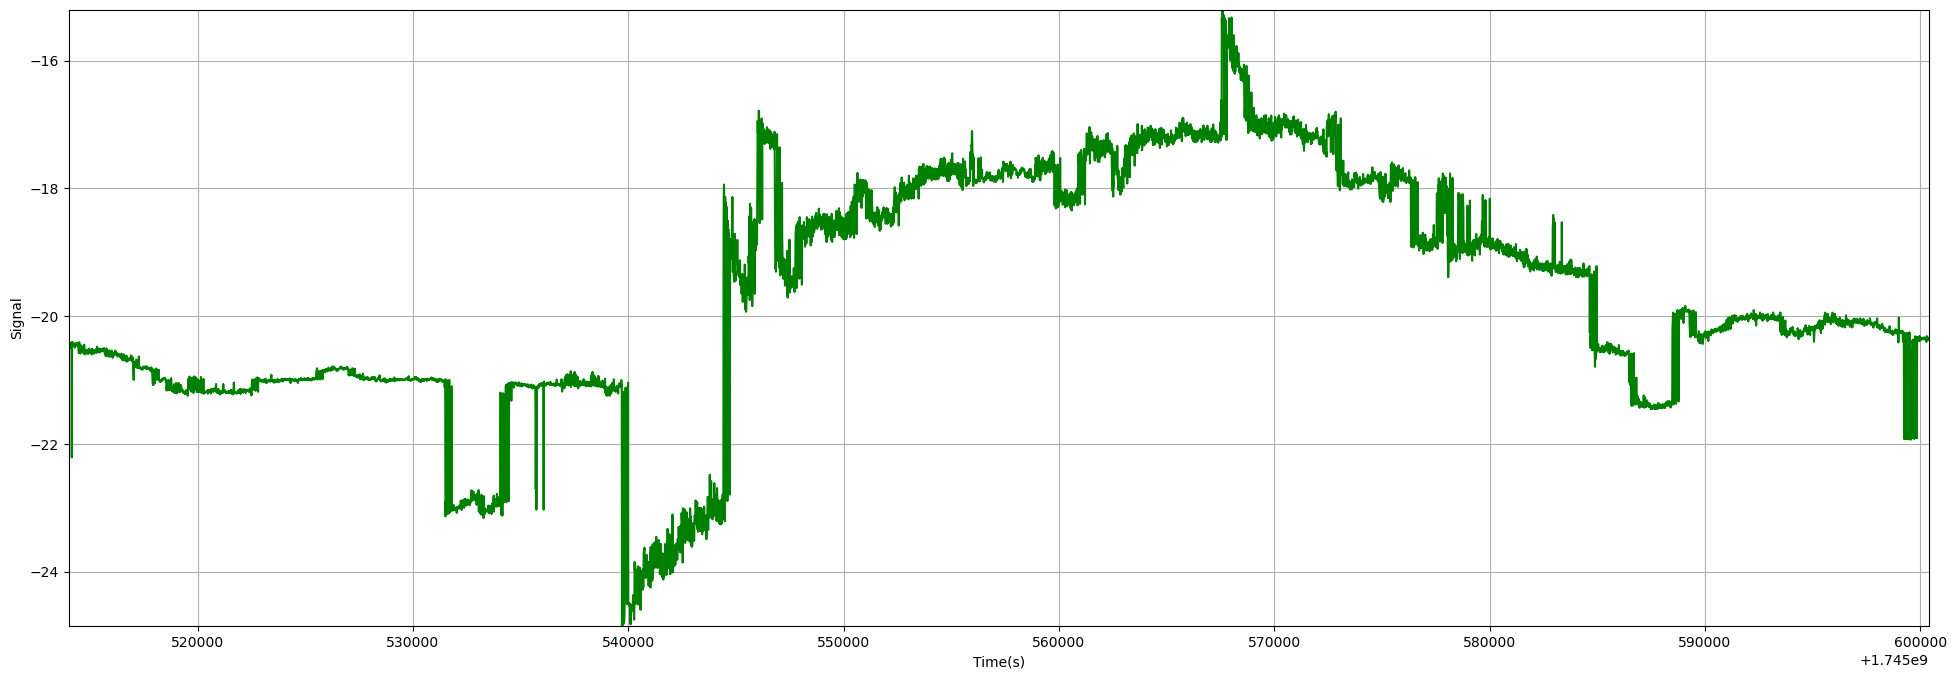

In [11]:
fig, ax = plt.subplots(1, 1, figsize=[24, 8])
ax.set(xlabel='Time(s)', ylabel='Signal')
ax.grid()

# Vẽ đúng dữ liệu
ax.plot(time_list, power_list, color='green', linestyle='-')

# Dùng giới hạn phù hợp
ax.set_xlim(min(time_list), max(time_list))
ax.set_ylim(min(power_list), max(power_list))

plt.show()

In [7]:
def remove_spike(x, threshold=3, window_size=11):
    """
    Remove spikes from the x-axis.

    Parameters:
    x (numpy array): The x-axis to remove spikes from.
    threshold (float): The threshold to define spikes. Default value is 3.
    window_size (int): The size of the window to calculate the average. Default value is 11.

    Returns:
    x_smooth (numpy array): The x-axis with spikes removed.
    """
    # Calculate the mean of x
    x_mean = np.mean(x)

    # Calculate the standard deviation of x
    x_std = np.std(x)

    # Finding the indices of spikes
    spike = np.abs(x - x_mean) > threshold * x_std

    # Removing the spike
    x_smooth = np.copy(x)
    x_smooth[spike] = np.mean(x[~spike])

    # Using linear interpolation
    # x_smooth[spike] = np.interp(np.where(spike)[0], np.where(~spike)[0], x[~spike])           # Bad

    # Using Savitzky-Golay filter
    # x_smooth = signal.savgol_filter(x_smooth, window_size, 3)                                 # Dependence on Threshold

    # Using convolution
    x_smooth = np.convolve(x, np.ones(window_size)/window_size, mode='same')                    # Good

    return x_smooth


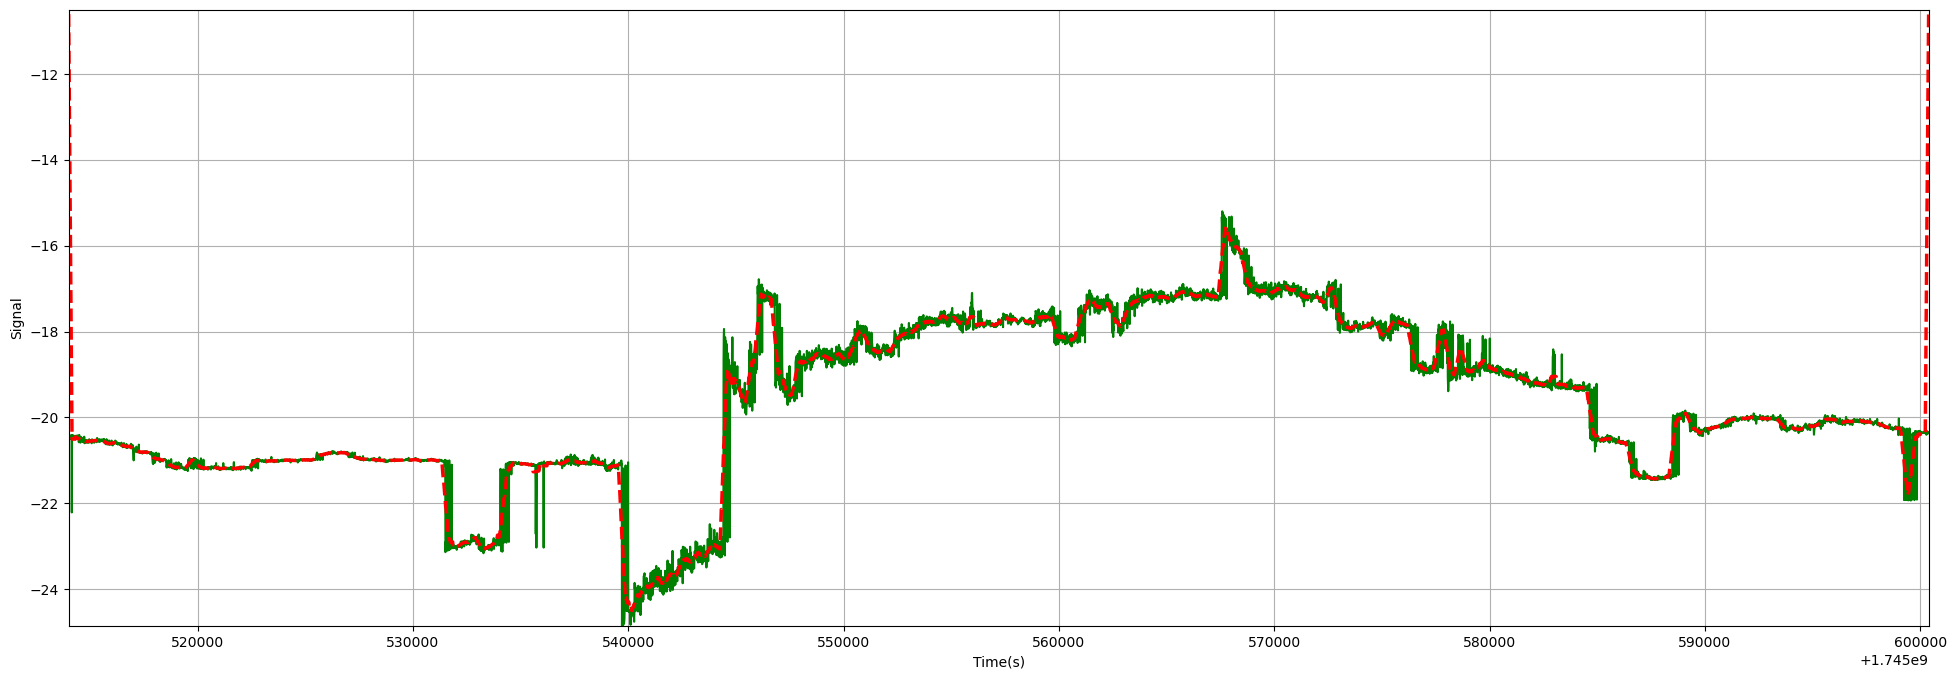

In [12]:
power_1 = remove_spike(power_list, threshold=3, window_size=31)

fig, ax_1 = plt.subplots(1, 1, figsize = [24, 8])
ax_1.set(xlabel = 'Time(s)', ylabel = 'Signal')
ax_1.plot(time_list, power_list, color = 'green', linestyle = '-')
ax_1.plot(time_list, power_1, color = 'red', linestyle = '--', linewidth = 2.5)
ax_1.set_xlim(min(time_list), max(time_list))
ax_1.set_ylim(min(min(power_list), min(power_1)), max(max(power_list), max(power_1)))
ax_1.grid()
plt.show()


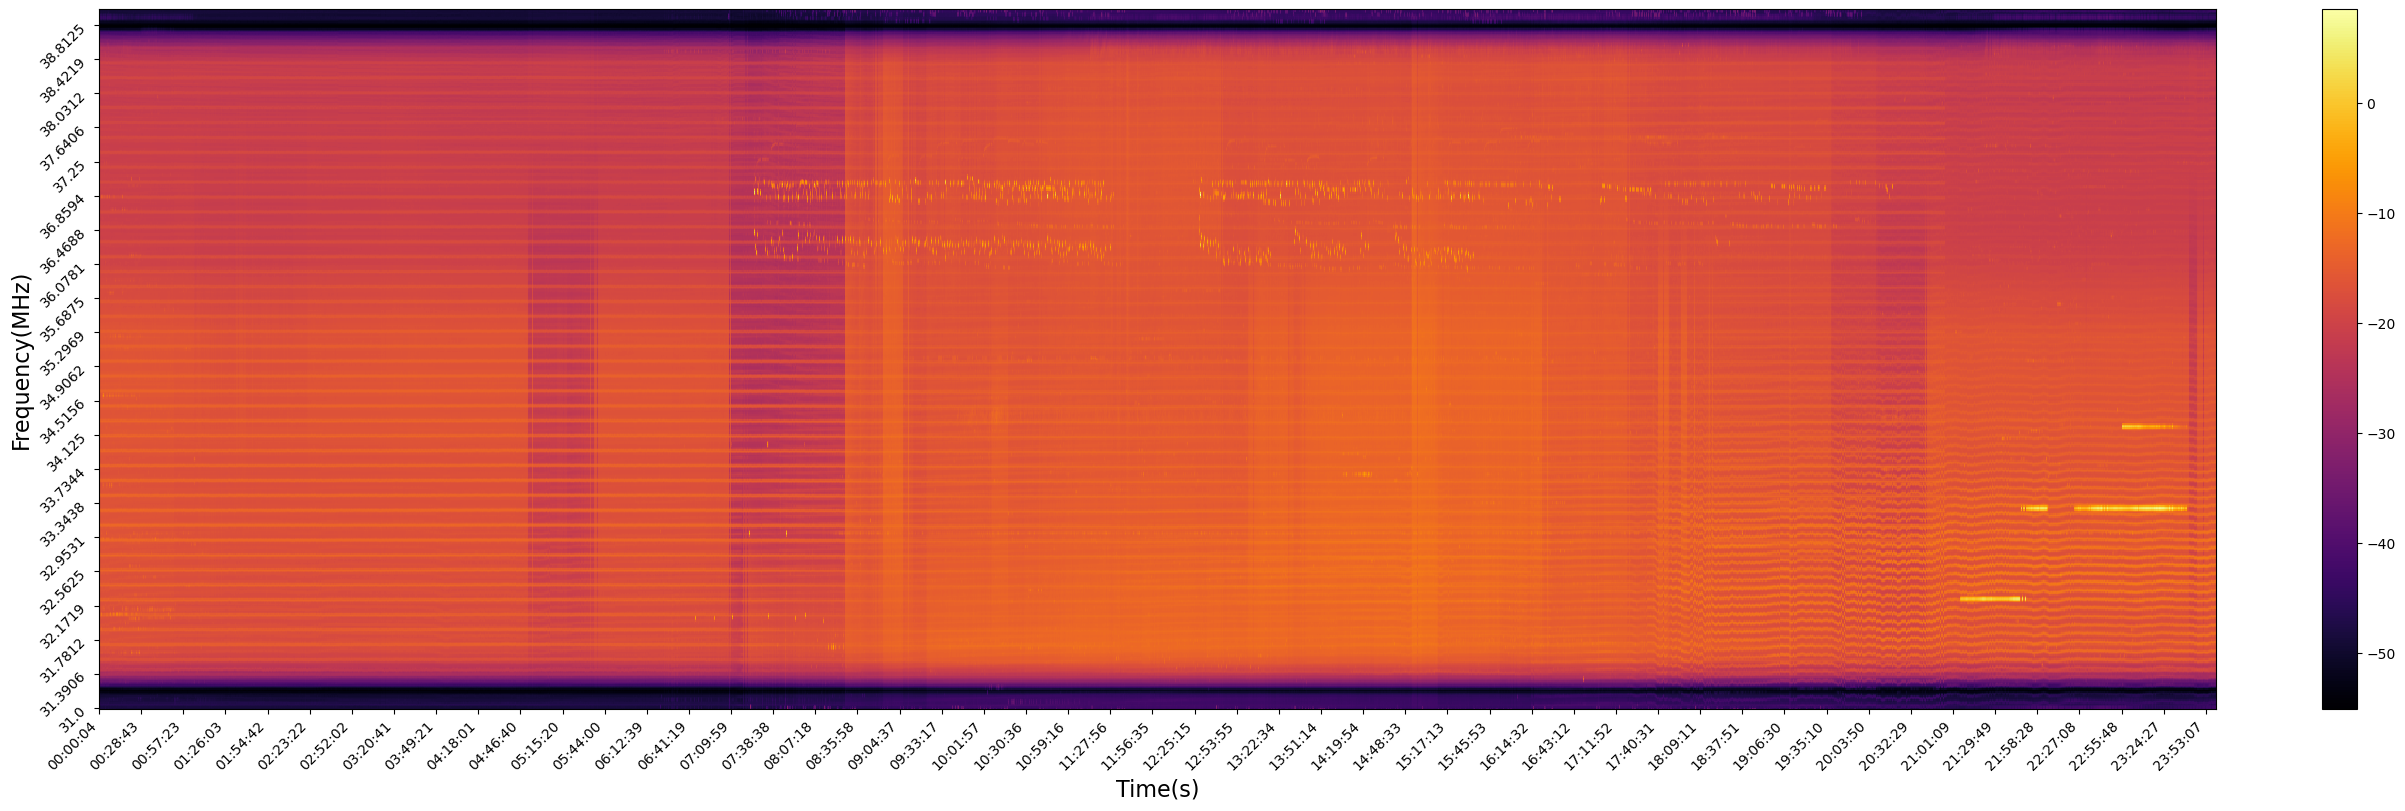

In [9]:
fig, ax_2 = plt.subplots(1, 1, figsize = [24, 8], layout = 'constrained')
ax_2.set_xlabel('Time(s)', fontsize=16)
ax_2.set_ylabel('Frequency(MHz)', fontsize=16)
plt.imshow(data_matrix, cmap = 'inferno', interpolation = 'nearest', aspect = 'auto', origin = 'lower')
x = np.arange(0, len(time1_list))
plt.xticks(x[::len(time1_list)//50], time1_list[::len(time1_list)//50], rotation=45, ha='right')
y = np.arange(0, 512)
plt.yticks(y[::len(Frequency)//20], Frequency[::len(Frequency)//20], rotation=45, ha='right')
plt.colorbar()
plt.show()